# Masses and volumes

This example notebook shows how thicknesses, densities, porosities and n/p ratios impact the mass and volume loadings of an electrode stack. For this, different input options are shown, the loadings are plotted and printed with a dataframe and a scatterplot matrix is plotted, which can visualizes the relative influence of different parameters on energy densities.

The simplist way to create a TEA class is to start with a PyBaMM parameter-set and add/update values with an input parameter-set.

In [7]:
import pybamm
from pybamm_tea import tea
import numpy as np
import matplotlib.pyplot as plt

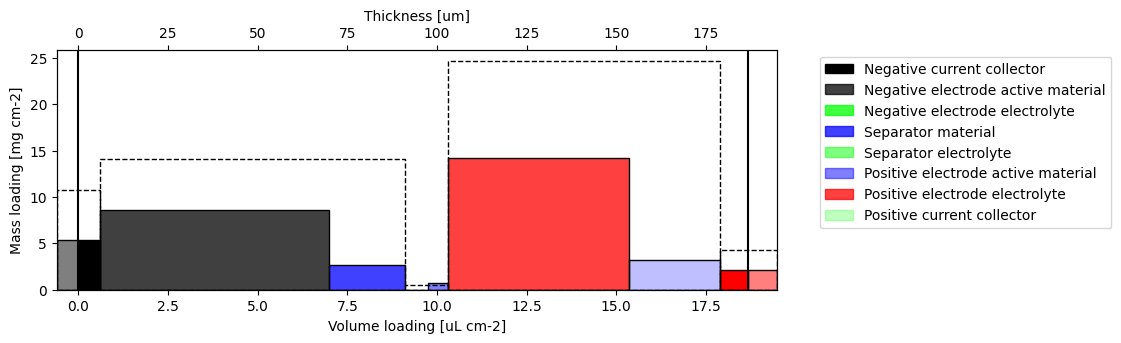

,Volume loading [uL.cm-2],Mass loading [mg.cm-2],Density [mg.uL-1]
Negative electrode electrolyte,2.1300,2.717880,1.276000
Negative electrode active material,6.3900,8.549820,1.338000
Negative electrode inactive material,0.0000,0.000000,0.000000
Negative electrode dry,8.5200,11.399760,1.338000
Negative electrode,8.5200,14.117640,1.657000
Positive electrode electrolyte,2.5326,3.231598,1.276000
Positive electrode active material,5.0274,14.250366,2.834540
Positive electrode inactive material,0.0000,0.000000,0.000000
Positive electrode dry,7.5600,21.429122,2.834540
Positive electrode,7.5600,24.660720,3.262000


In [8]:
# input parameter-set
input = {
    "Electrolyte density [kg.m-3]": 1276, # LiPF6 in EC:EMC 3:7 + 2% VC
}

# base parameter-sets
base = pybamm.ParameterValues("Chen2020")

# create a TEA class
tea_class = tea.TEA(base, input)

# plot the mass and volume loadings
tea_class.plot_masses_and_volumes()

# get the mass and volume loadings as a dataframe
tea_class.masses_and_volumes_dataframe


### Did you spot the negative separator material density?

The inactive/separator material density is calculated as the remainder from the (parameter-set-) electrode/separator density and the (input-) active material & electrolyte density with respect to the volume fractions.

\begin{equation*}
\rho_{\text {separator material}}=\frac{\rho_{\text {separator }}-\varepsilon_{}\rho_{\text {electrolyte }}}{v_{\text {separator material}}}
\end{equation*}

\begin{equation*}
\rho_{\text {inactive }}=\frac{\rho_{\text {electrode }}-v_{\text {active }} \rho_{\text {active }}-\varepsilon_{}\rho_{\text {electrolyte }}}{v_{\text {inactive }}}
\end{equation*}

In this specific example case, the value for the (wet) separator density is the value of the dry separator density, which leads to the negative value, similarly also inactive material densities can become negative. Another special case of this parameter-set is that there are no inactive materials considered explicitly, so that no active material densities need to be provided, as they can be calculated as the dry electrode densities. If inactive materials are added, also densities for the active materials need to be supplied.

Let's update the separator density.

The separator density can directly be inputted, but also be updated based on the dry separator density or the separator material density as input (if one both is given and the other not). The calculation also depends on the separator porosity and electrolyte density, which are possible inputs as well.

To be implemented:
If both dry separator density and separator material density are given, the porosity is updated (see Warning's).

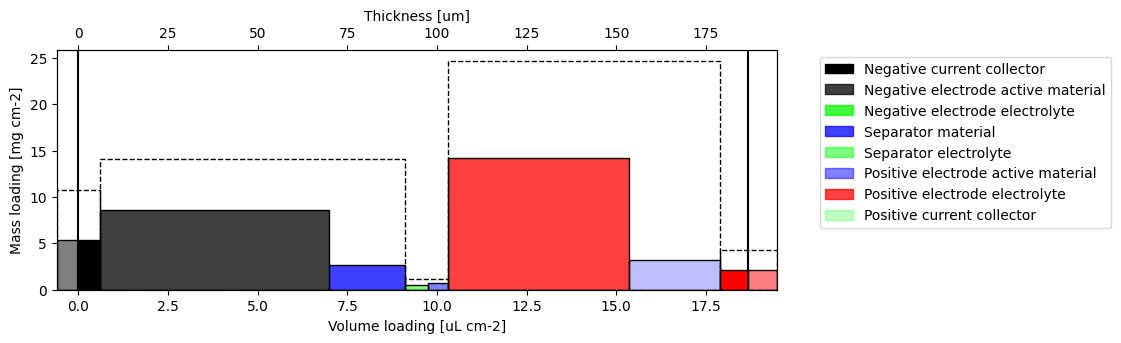

,Volume loading [uL.cm-2],Mass loading [mg.cm-2],Density [mg.uL-1]
Negative electrode electrolyte,2.1300,2.717880,1.276000
Negative electrode active material,6.3900,8.549820,1.338000
Negative electrode inactive material,0.0000,0.000000,0.000000
Negative electrode dry,8.5200,11.399760,1.338000
Negative electrode,8.5200,14.117640,1.657000
Positive electrode electrolyte,2.5326,3.231598,1.276000
Positive electrode active material,5.0274,14.250366,2.834540
Positive electrode inactive material,0.0000,0.000000,0.000000
Positive electrode dry,7.5600,21.429122,2.834540
Positive electrode,7.5600,24.660720,3.262000


In [9]:
input["Separator dry density [kg.m-3]"] = 397
tea_class = tea.TEA(base, input)
tea_class.plot_masses_and_volumes()
tea_class.masses_and_volumes_dataframe

### Electrode density calculation

For the electrode density calculation, more flexibility with the input is possible - there are five options;

1. The simplist way for adding inactive materials is to provide an inactive material density and dry electrode mass fraction. Based on those, the electrode density and the active material volume fraction are updated.

\begin{equation*}
\begin{aligned}
& v_{\text {active }}=(1-\varepsilon) \frac{\frac{w_{\text {active }}}{\rho_{\text {active }}}}{\frac{w_{\text {active }}}{\rho_{\text {active }}}+\frac{1-w_{\text {active }}}{\rho_{\text {inactive }}}} \\
& \rho_{\text {dry electrode }}=v_{\text {active }} \rho_{\text {active }}+\left(1-v_{\text {active }}-\varepsilon\right) \rho_{\text {inactive }} \\
& \rho_{\text {electrode }}=\rho_{\text {dry electrode }}+\varepsilon \rho_{\text {electrolyte }}
\end{aligned}
\end{equation*}

2. The inactive materials can also be splitted into binder and conductive additive. If the dry electrode mass fractions and densities for both are supplied, the inactive material mass fraction and density is calculated from them.

\begin{equation*}
\begin{aligned}
& w_{\text {inactive }}=w_{\text {conductive }}+w_{\text {binder }} \\
& \rho_{\text {inactive }}=\frac{w_{\text {inactive }}}{\frac{w_{\text {conductive }}}{\rho_{\text {conductive }}}+\frac{w_{\text {binder }}}{\rho_{\text {binder }}}} \\
& w_{\text {active }}=1-w_{\text {conductive }}+w_{\text {binder }}
\end{aligned}
\end{equation*}

3. Despite that, one can also input the dry electrode density and active material density together with the active material dry mass fraction to calculate the inactive material- and electrode density.

\begin{equation*}
\begin{aligned}
& \rho_{\text {inactive }}=\frac{\left(1-w_{\text {active }}\right) \rho_{\text {dry electrode }}}{1-w_{\text {active }} \frac{\rho_{\text {diry slectrode }}}{\rho_{\text {active }}}} \\
& v_{\text {active }}=(1-\varepsilon) \frac{\frac{w_{\text {active }}}{\rho_{\text {antive }}}}{\frac{w_{\text {active }}}{\rho_{\text {active }}}+\frac{1-w_{\text {active }}}{\rho_{\text {innactive }}}} \\
& \rho_{\text {electrode }}=\rho_{\text {dry electrode }}+\varepsilon \rho_{\text {electrolyte }}
\end{aligned}
\end{equation*}


To be implemented:

4. Like 3, but with the inactive material density as input, instead of the active material density.

5. Finally, if one adds both active and inactive material density on top of the dry electrode density and active material dry mass fraction, the porosity can be estimated based on the material densities. Note, that the supplied material densities do not consider particle swelling with lithiation or binder swelling with electrolyte, such that the actual porosity might be lower than the calculated one below.

\begin{equation*}
\varepsilon=\frac{\rho_{\text {dry electrode }}}{w_{\text {active }} \rho_{\text {active }}+w_{\text {inactive }} \rho_{\text {inactive }}}
\end{equation*}

A short summary:

\begin{aligned}
& w_{\text {conductive }}, \rho_{\text {conductive }}, w_{\text {binder }}, \rho_{\text {binder }} \quad \rightarrow \quad \rho_{\text {inactive }}, w_{\text {active }} \\
& w_{\text {active }}+\text { two of } ( \rho_{\text {active }}, \rho_{\text {inactive }}, \rho_{\text {dry electrode }} ) \rightarrow v_{\text {active }}, \rho_{\text {electrode }}, \rho_x \\
& w_{\text {active }}, \rho_{\text {active }}, \rho_{\text {inactive }}, \rho_{\text {dry electrode }} \quad \rightarrow v_{\text {active }}, \rho_{\text {electrode }}, \varepsilon \\
&
\end{aligned}

In [10]:
# create four electrode input parameter-sets with different input parameters
positive_electrode_1 = {
    "Positive electrode inactive material density [kg.m-3]": 1800, # PVDF and CB (swells with electrolyte)
    "Positive electrode active material dry mass fraction": 0.95,
    "Positive electrode active material density [kg.m-3]": 4750, # NMC (swells with lithiation)
}

negative_electrode_2 = {
    "Negative electrode binder density [kg.m-3]": (2 * 940 + 1600) / 3, # 2:1 CMC:SBR
    "Negative electrode conductive additive density [kg.m-3]": 1800, # CB
    "Negative electrode binder dry mass fraction": 0.03,
    "Negative electrode conductive additive dry mass fraction": 0.02,
    "Negative electrode active material density [kg.m-3]": 2266, # Graphite
}

positive_electrode_3 = {
    "Positive electrode dry density [kg.m-3]": 3000, # NMC + PVDF + CB
    "Positive electrode active material dry mass fraction": 0.95,
    "Positive electrode active material density [kg.m-3]": 4750, # NMC
    #"Positive electrode inactive material density [kg.m-3]": 1800, # PVDF + CB
}

negative_electrode_4 = {
    "Negative electrode dry density [kg.m-3]": 1700, # Graphite + CMC + SBR + CB
    "Negative electrode active material dry mass fraction": 0.95,
    "Negative electrode active material density [kg.m-3]": 2266, # Graphite
    "Negative electrode inactive material density [kg.m-3]": 1400, # CMC + SBR + CB
}

# copy input and update with new parameters
input.update(positive_electrode_1)
input.update(negative_electrode_2)

# create a TEA class
# tea_class = tea.TEA(base, input)
# tea_class.plot_masses_and_volumes()
# display(tea_class.masses_and_volumes_dataframe)

# copy input and update with new parameters
# inputs_3_4 = input.copy()
# inputs_3_4.update(positive_electrode_3)
# inputs_3_4.update(negative_electrode_4)

# create a TEA class
# tea_class_3_4 = tea.TEA(base, input)
# tea_class_3_4.plot_masses_and_volumes()
# tea_class_3_4.masses_and_volumes_dataframe


### Stack energy densities

The volumetric stack energy can be calculated from the areal capacity, the average OCP and the (single-)stack thickness, as below:

\begin{equation*}
E_{\text {stack }}^{\text {volumetric }}=\frac{q_{\text {area }}\bar{U}}{\frac{d_{c c}^{-}}{2}+d_{-}+d_{\text {sep}}+d_{+}+\frac{d_{c c}^{+}}{2}}
\end{equation*}

From the compartment thicknesses and densities one can calculate the stack density. When dividing the volumetric stack energy with the stack density, the gravimetric stack energy is obtained. The stack energy densities can be found in a dataframe and in a dictionary, as below.

In [11]:
# print stack energy densities dictionary
print(tea_class.stack_energy)
# print stack energy densities dataframe
tea_class.stack_energy_dataframe

{'Negative electrode stoichiometry at 0% SoC': 0.02634730145141186, 'Negative electrode stoichiometry at 100% SoC': 0.9106121196114546, 'Positive electrode stoichiometry at 100% SoC': 0.2638491800715496, 'Positive electrode stoichiometry at 0% SoC': 0.8539736661258583, 'Negative electrode volumetric capacity [A.h.L-1]': 588.9272781345895, 'Negative electrode gravimetric capacity [A.h.kg-1]': 355.4177900631198, 'Negative electrode active material practical capacity [A.h.kg-1]': 586.8732218580863, 'Negative electrode capacity [mA.h.cm-2]': 5.017660409706703, 'Negative electrode theoretical capacity [mA.h.cm-2]': 5.674386571374999, 'Positive electrode volumetric capacity [A.h.L-1]': 663.7116944056485, 'Positive electrode gravimetric capacity [A.h.kg-1]': 203.46771747567396, 'Positive electrode active material practical capacity [A.h.kg-1]': 352.1074665922367, 'Positive electrode capacity [mA.h.cm-2]': 5.017660409706702, 'Positive electrode theoretical capacity [mA.h.cm-2]': 8.502715152959

,Parameter,Unit,Value
0,Volumetric stack energy,W.h.L-1,997.596702
1,Gravimetric stack energy,W.h.kg-1,392.231953
2,Areal stack energy,W.h.m-2,186.351064
3,Stack average OCP,V,3.713903
4,Capacity,mA.h.cm-2,5.017660
5,Stack thickness,um,186.800000
6,Stack density,kg.L-1,2.543385


### Scatter plot matrix

A scatter plot matrix can be useful to compare the relative impact of different parameters.

In this example the influence of thickness, porosity and n/p ratio is compared. The positive electrode thickness and the negative electrode porosity are varied with a fixed theoretical n/p ratio and the theoretical n/p ratio is varied with a fixed positive electrode thickness. For all three parameter variation's, array's of values are created, over which in loops input parameter-sets are updated, TEA classes created and values of interest are saved in lists. The plot shows the gravimetric and volumetric stack energy and the negative electrode thickness.

The logic for the calculation of an electrode thickness based on the other electrode thickness and the theoretical n/p ratio (the ratio of theoretical maximal capacities of the electrodes) is as follows: If _both thicknesses or only the positive thickness_ and the n/p are given, the _negative electrode thickness_ is updated. If _only the negative thickness_ and the n/p ratio are given, the _positive electrode thickness_ is calculated.

When changing the n/p ratio, the initial concentrations in the particles should be changed according to how the lithium is brought into the cell. If the lithium is initially only in the positive electrode with the maximum possible concentration, this can be done by setting the initial conditions to None. More information on this is in the "Capacities and potentials" notebook.

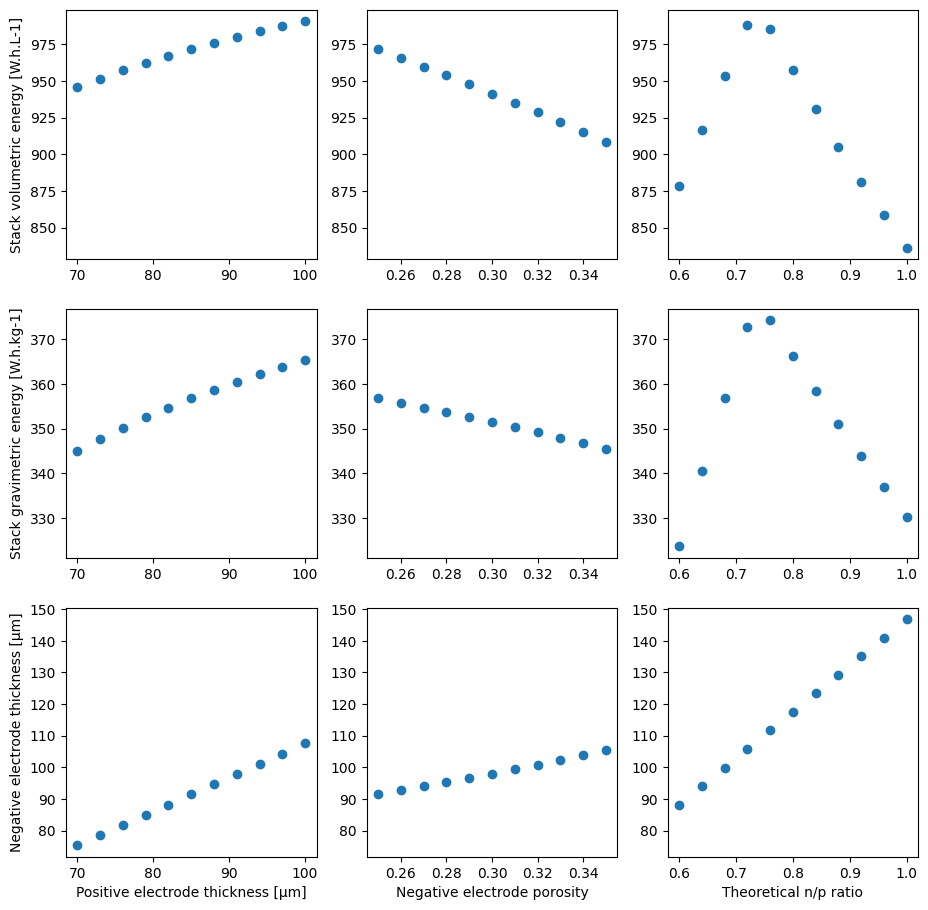

In [12]:
# initialize the fix theoretical n/p ratio for the thickness calculation
input["Theoretical n/p ratio"] = 2/3

# initialize the active material concentrations to the zero in the negative electrode and to the maximum in the positive electrode
input["Initial concentration in negative electrode [mol.m-3]"] = None
input["Initial concentration in positive electrode [mol.m-3]"] = None

# generate an array's of thicknesses and n/p ratios to loop over
pe_thicknesses = np.linspace(70e-6, 100e-6, 11)
ne_porosities = np.linspace(0.25, 0.35, 11)
th_n_p_ratios = np.linspace(0.6, 1, 11)

# initialize lists for the stack energy densities
stack_volumetric_energy_thickness = []
stack_gravimetric_energy_thickness = []
stack_volumetric_energy_porosity = []
stack_gravimetric_energy_porosity = []
stack_volumetric_energy_n_p = []
stack_gravimetric_energy_n_p = []
ne_thickness_thickness = []
ne_thickness_porosity = []
ne_thickness_n_p = []
practical_n_p_ratios = []

# loop over the thicknesses and calculate the stack energy densities
for thickness in pe_thicknesses:
    # update the positive electrode thickness in the input
    input.update({"Positive electrode thickness [m]": thickness})
    
    # create a TEA class with the updated input
    tea_class = tea.TEA(base, input)

    # save the calculated stack energy densities in the lists
    stack_volumetric_energy_thickness.append(tea_class.stack_energy.get("Volumetric stack energy [W.h.L-1]"))
    stack_gravimetric_energy_thickness.append(tea_class.stack_energy.get("Gravimetric stack energy [W.h.kg-1]"))
    ne_thickness_thickness.append(tea_class.parameter_values.get("Negative electrode thickness [m]"))   

# initialize the positive electrode thickness to calculate the negative electrode thickness based on the theoretical n/p ratio
input["Positive electrode thickness [m]"] = 85e-6
# loop over the porosities and calculate the stack energy densities
for porosity in ne_porosities:
    # update the negative electrode porosity in the input
    input.update({"Negative electrode porosity": porosity})
    
    # create a TEA class with the updated input
    tea_class = tea.TEA(base, input)

    # save the calculated stack energy densities in the lists
    stack_volumetric_energy_porosity.append(tea_class.stack_energy.get("Volumetric stack energy [W.h.L-1]"))
    stack_gravimetric_energy_porosity.append(tea_class.stack_energy.get("Gravimetric stack energy [W.h.kg-1]"))
    ne_thickness_porosity.append(tea_class.parameter_values.get("Negative electrode thickness [m]"))

# initialize the porosity
input["Negative electrode porosity"] = 0.3
# loop over the theoretical n/p ratios and calculate the stack energy densities
for th_n_p_ratio in th_n_p_ratios:
    # update the positive electrode thickness in the input
    input.update({"Theoretical n/p ratio": th_n_p_ratio})
    
    # create a TEA class with the updated input
    tea_class = tea.TEA(base, input)

    # save the calculated stack energy densities in the lists
    stack_volumetric_energy_n_p.append(tea_class.stack_energy.get("Volumetric stack energy [W.h.L-1]"))
    stack_gravimetric_energy_n_p.append(tea_class.stack_energy.get("Gravimetric stack energy [W.h.kg-1]"))
    ne_thickness_n_p.append(tea_class.parameter_values.get("Negative electrode thickness [m]"))
    practical_n_p_ratios.append(tea_class.stack_energy.get("Practical n/p ratio"))

# create a figure with 9 subplots
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(11, 11))

# plot the stack energy densities vs the negative electrode thickness
ax1.scatter(pe_thicknesses * 1e6, stack_volumetric_energy_thickness)
ax1.set_ylabel("Stack volumetric energy [W.h.L-1]")
ax4.scatter(pe_thicknesses * 1e6, stack_gravimetric_energy_thickness)
ax4.set_ylabel("Stack gravimetric energy [W.h.kg-1]")
ax7.scatter(pe_thicknesses * 1e6, [x * 1e6 for x in ne_thickness_thickness])
ax7.set_ylabel("Negative electrode thickness [µm]")
ax7.set_xlabel("Positive electrode thickness [µm]")
# plot the stack energy densities vs the negative electrode porosity
ax2.scatter(ne_porosities, stack_volumetric_energy_porosity)
ax5.scatter(ne_porosities, stack_gravimetric_energy_porosity)
ax8.scatter(ne_porosities, [x * 1e6 for x in ne_thickness_porosity])
ax8.set_xlabel("Negative electrode porosity")
# plot the stack energy densities vs the theoretical n/p ratio
ax3.scatter(th_n_p_ratios, stack_volumetric_energy_n_p)
ax6.scatter(th_n_p_ratios, stack_gravimetric_energy_n_p)
ax9.scatter(th_n_p_ratios, [x * 1e6 for x in ne_thickness_n_p], label="ne thickness")
ax9.set_xlabel("Theoretical n/p ratio")

# set the y-axis limits for ax1, ax2, and ax3
row1_y_min = min(min(stack_volumetric_energy_thickness), min(stack_volumetric_energy_porosity), min(stack_volumetric_energy_n_p))
row1_y_max = max(max(stack_volumetric_energy_thickness), max(stack_volumetric_energy_porosity), max(stack_volumetric_energy_n_p))
row1_range = row1_y_max - row1_y_min
ax1.set_ylim(row1_y_min - 0.05 * row1_range, row1_y_max + 0.05 * row1_range)
ax2.set_ylim(row1_y_min - 0.05 * row1_range, row1_y_max + 0.05 * row1_range)
ax3.set_ylim(row1_y_min - 0.05 * row1_range, row1_y_max + 0.05 * row1_range)
# set the y-axis limits for ax4, ax5, and ax6
row2_y_min = min(min(stack_gravimetric_energy_thickness), min(stack_gravimetric_energy_porosity), min(stack_gravimetric_energy_n_p))
row2_y_max = max(max(stack_gravimetric_energy_thickness), max(stack_gravimetric_energy_porosity), max(stack_gravimetric_energy_n_p))
row2_range = row2_y_max - row2_y_min
ax4.set_ylim(row2_y_min - 0.05 * row2_range, row2_y_max + 0.05 * row2_range)
ax5.set_ylim(row2_y_min - 0.05 * row2_range, row2_y_max + 0.05 * row2_range)
ax6.set_ylim(row2_y_min - 0.05 * row2_range, row2_y_max + 0.05 * row2_range)
# set the y-axis limits for ax7, ax8, and ax9
row3_y_min = min(min([x * 1e6 for x in ne_thickness_thickness]), min([x * 1e6 for x in ne_thickness_porosity]), min([x * 1e6 for x in ne_thickness_n_p]))
row3_y_max = max(max([x * 1e6 for x in ne_thickness_thickness]), max([x * 1e6 for x in ne_thickness_porosity]), max([x * 1e6 for x in ne_thickness_n_p]))
row3_range = row3_y_max - row3_y_min
ax7.set_ylim(row3_y_min - 0.05 * row3_range, row3_y_max + 0.05 * row3_range)
ax8.set_ylim(row3_y_min - 0.05 * row3_range, row3_y_max + 0.05 * row3_range)
ax9.set_ylim(row3_y_min - 0.05 * row3_range, row3_y_max + 0.05 * row3_range)

# show the plot
plt.show()